In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig
import scipy.fftpack as fftp
from math import pi

I want to generate a time stream that is T long with a step size $dt$. I'll add colored noise to this spectrum working from the fourier representation

In [2]:
fs = 100e6
N = (1<<16) + 1
dt = 1/fs
t = np.arange(-N//2, N//2)*dt
T = N*dt

print ("I'll be accumulating %d samples"%N)
print ("Generating a time stream that is %1.5e seconds long with a step size of %1.5e"%(T, dt))

I'll be accumulating 65537 samples
Generating a time stream that is 6.55370e-04 seconds long with a step size of 1.00000e-08


In [3]:
freqs = fftp.fftshift(fftp.fftfreq(N, dt))

In [16]:
def flicker_spectrum(nu, nu_c, b0):
    bm = nu_c * b0
    return bm/nu + b0

In [18]:
half_noise = np.random.randn(N//2)/np.sqrt(2) + 1j * np.random.randn(N//2)/np.sqrt(2)
# Window the spectrum to prevent aliasing
nu_0 = 5000#fs/2
window = 1/(1 + 1j*2*pi*(freqs[N//2+1:]/nu_0))
half_noise *= window
P_flicker = flicker_spectrum(freqs[N//2+1:], 200, 10)
half_noise *= np.sqrt(P_flicker)

In [19]:
full_noise = np.zeros_like(freqs, dtype=np.complex128)
full_noise[N//2+1:] = half_noise
full_noise[:N//2] = half_noise[-1::-1]
full_noise[N//2] = np.random.randn()
# full_noise = (np.random.randn(N) + 1j * np.random.randn(N))/np.sqrt(2)
# window = 1/(1 + 1j*2*pi*(freqs/nu_0))
# full_noise *= window

In [25]:
# Take the fourier transform to obtain a real noise timestream
# ts = fftp.fftshift(fftp.fft(full_noise))
ts = fftp.fft(full_noise)
ti = ts.imag
ts = ts.real

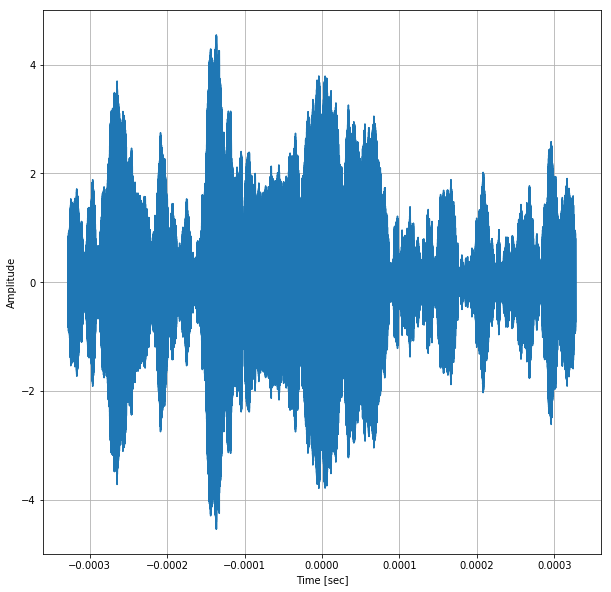

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, ts)
ax.set_xlabel(r'Time [sec]')
ax.set_ylabel(r'Amplitude')
ax.axis('tight')
ax.grid(which='both');

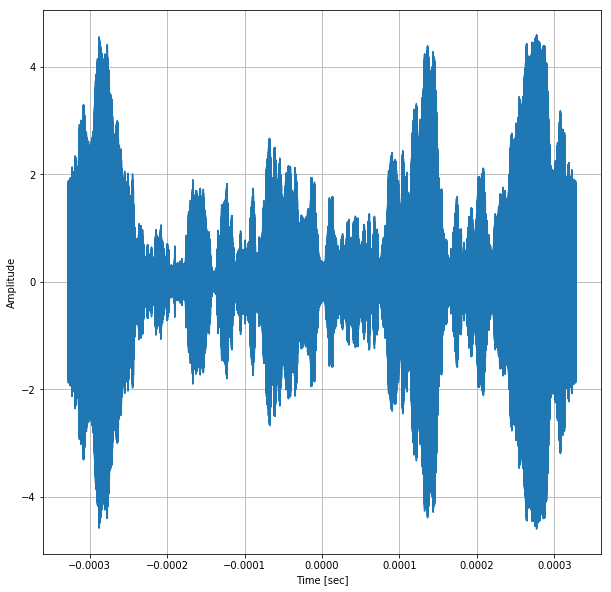

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, ti)
ax.set_xlabel(r'Time [sec]')
ax.set_ylabel(r'Amplitude')
ax.axis('tight')
ax.grid(which='both');

In [28]:
noise2 = fftp.fft(ts)

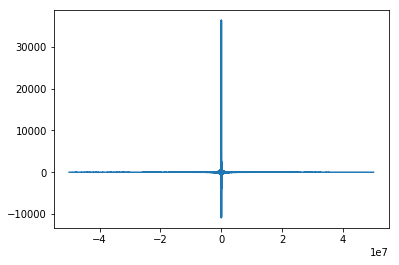

In [29]:
plt.plot(freqs, noise2.real)

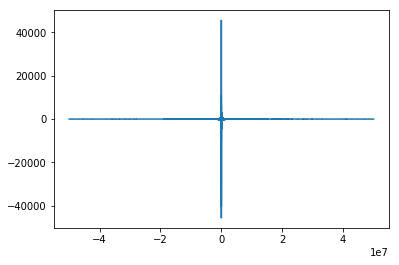

In [30]:
plt.plot(freqs, noise2.imag)

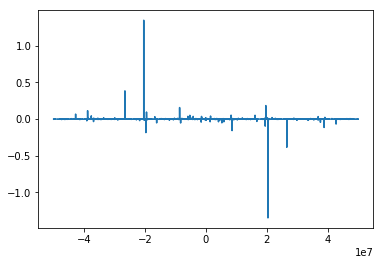

In [31]:
plt.plot(freqs, full_noise.real/noise2.real)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


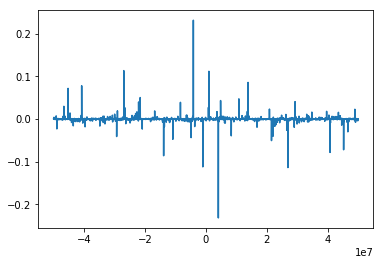

In [32]:
plt.plot(freqs, full_noise.imag/noise2.imag)